In [2]:
import pandas as pd
Wine = pd.read_csv("WineQT.csv")
Wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


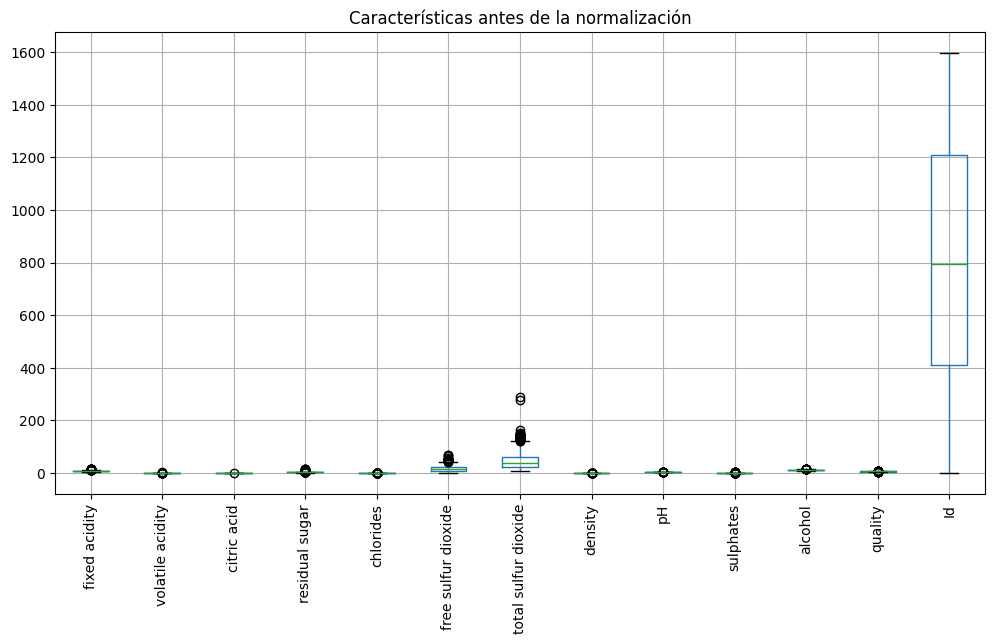

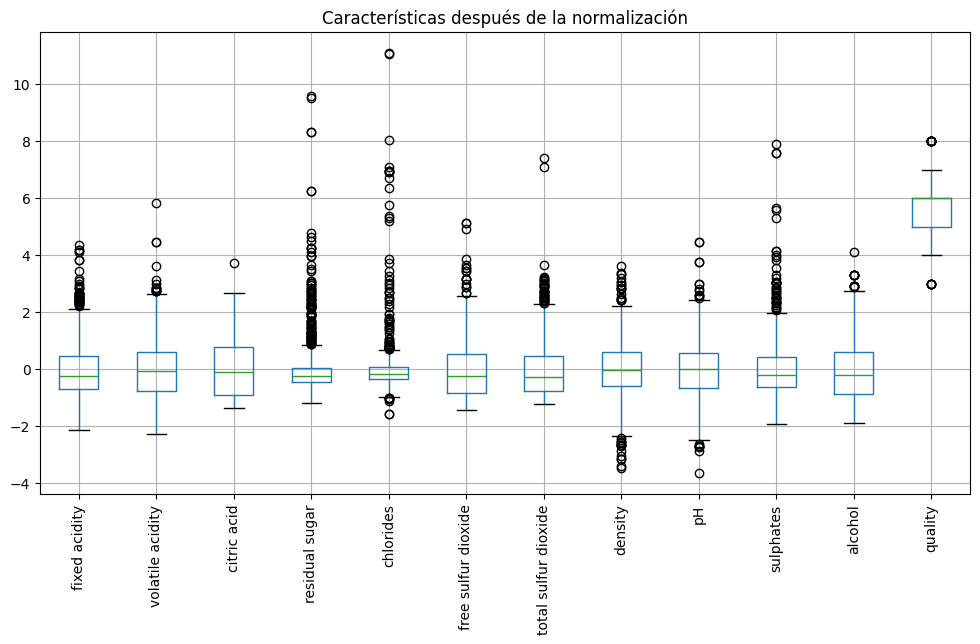

In [17]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Antes de la normalización
plt.figure(figsize=(12,6))
Wine.boxplot()
plt.title('Características antes de la normalización')
plt.xticks(rotation=90)
plt.show()

# Normalización de caracteristicas
scaler = StandardScaler()
Wine_imputed = Wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

Wine_scaled = pd.DataFrame(scaler.fit_transform(Wine_imputed), columns=Wine_imputed.columns)
Wine_scaled["quality"] = Wine["quality"]

Wine = Wine_scaled 

plt.figure(figsize=(12,6))
Wine.boxplot()
plt.title('Características después de la normalización')
plt.xticks(rotation=90)
plt.show()

In [18]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

Wine['Calidad'] = np.where(Wine['quality'] >= 7, 1, 0)

X = Wine.drop(columns=["pH", "density","residual sugar","citric acid","Calidad","quality","Calidad"])
y = Wine.Calidad

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=2000)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

coef_log_reg = []
precision_scores = []
recall_scores = []

for fold, (train_index, test_index) in enumerate(skf.split(X_train, y_train), 1):
    
    X_fold_train, X_fold_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]
        
    log_reg.fit(X_fold_train, y_fold_train)
    
    coef_log_reg.append(log_reg.coef_[0])
    
    y_pred = log_reg.predict(X_fold_train)
    
    precision = precision_score(y_fold_train, y_pred)
    recall = recall_score(y_fold_train, y_pred)
    
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1 = f1_score(y_fold_train, y_pred)

    print(f"Fold {fold}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, f1: {f1:.2f}")
    print("-" * 30)

coef_df = pd.DataFrame(coef_log_reg, columns=X.columns)

print("Desempeño promedio en validación cruzada:")
print(f"Precision promedio: {np.mean(precision_scores):.4f}")
print(f"Recall promedio: {np.mean(recall_scores):.4f}\n"+"-"*30)
coef_df

### REEEEEEEEEEEEEEEEEEEEEEEEEEEEEAAAAAAAAAAAAAAAAAAAAAAAAAL

Fold 1
Precision: 0.6071, Recall: 0.3269, f1: 0.42
------------------------------
Fold 2
Precision: 0.5690, Recall: 0.3143, f1: 0.40
------------------------------
Fold 3
Precision: 0.6071, Recall: 0.3238, f1: 0.42
------------------------------
Fold 4
Precision: 0.6000, Recall: 0.3143, f1: 0.41
------------------------------
Fold 5
Precision: 0.6102, Recall: 0.3429, f1: 0.44
------------------------------
Desempeño promedio en validación cruzada:
Precision promedio: 0.5987
Recall promedio: 0.3244
------------------------------


,fixed acidity,volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,0.219166,-0.878266,-0.301222,0.075448,-0.278959,0.444508,0.988128
1,0.217592,-0.814811,-0.342053,-0.027352,-0.235241,0.532001,1.071660
2,0.225158,-0.631239,-0.294338,0.078858,-0.562235,0.591248,1.082135
3,0.166203,-0.695891,-0.688389,-0.019577,-0.264267,0.660720,0.916126
4,0.264555,-0.795699,-0.337075,0.039485,-0.324830,0.534916,0.993129


In [19]:
threshold = 0.5

coef_log_reg = []
precision_scores = []
recall_scores = []
f1_scores = []

for fold, (train_index, test_index) in enumerate(skf.split(X_train, y_train), 1):

    X_fold_train, X_fold_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]

    log_reg.fit(X_fold_train, y_fold_train)
    
    y_probs = log_reg.predict_proba(X_fold_train)[:, 1]
    
    y_pred_custom = (y_probs >= threshold).astype(int)
    
    precision = precision_score(y_fold_train, y_pred_custom)
    recall = recall_score(y_fold_train, y_pred_custom)
    f1 = f1_score(y_fold_train, y_pred_custom)


    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    coef_log_reg.append(log_reg.coef_[0])
    
    print(f"Fold {fold}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, f1: {f1:.2f}")
    print("-" * 30)

print("Desempeño promedio en validación cruzada:")
print(f"Precision promedio: {np.mean(precision_scores):.4f}")
print(f"Recall promedio: {np.mean(recall_scores):.4f}")
print(f"f1 promedio: {np.mean(f1_scores):.4f}\n" + "-"*30)
coef_df = pd.DataFrame(coef_log_reg, columns=X.columns)
coef_df

Fold 1
Precision: 0.6071, Recall: 0.3269, f1: 0.42
------------------------------
Fold 2
Precision: 0.5690, Recall: 0.3143, f1: 0.40
------------------------------
Fold 3
Precision: 0.6071, Recall: 0.3238, f1: 0.42
------------------------------
Fold 4
Precision: 0.6000, Recall: 0.3143, f1: 0.41
------------------------------
Fold 5
Precision: 0.6102, Recall: 0.3429, f1: 0.44
------------------------------
Desempeño promedio en validación cruzada:
Precision promedio: 0.5987
Recall promedio: 0.3244
f1 promedio: 0.4208
------------------------------


,fixed acidity,volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,0.219166,-0.878266,-0.301222,0.075448,-0.278959,0.444508,0.988128
1,0.217592,-0.814811,-0.342053,-0.027352,-0.235241,0.532001,1.071660
2,0.225158,-0.631239,-0.294338,0.078858,-0.562235,0.591248,1.082135
3,0.166203,-0.695891,-0.688389,-0.019577,-0.264267,0.660720,0.916126
4,0.264555,-0.795699,-0.337075,0.039485,-0.324830,0.534916,0.993129


In [20]:
model = LogisticRegression()

model.fit(X_train,y_train)

y_train_pred_proba = model.predict_proba(X_train)[:,1]

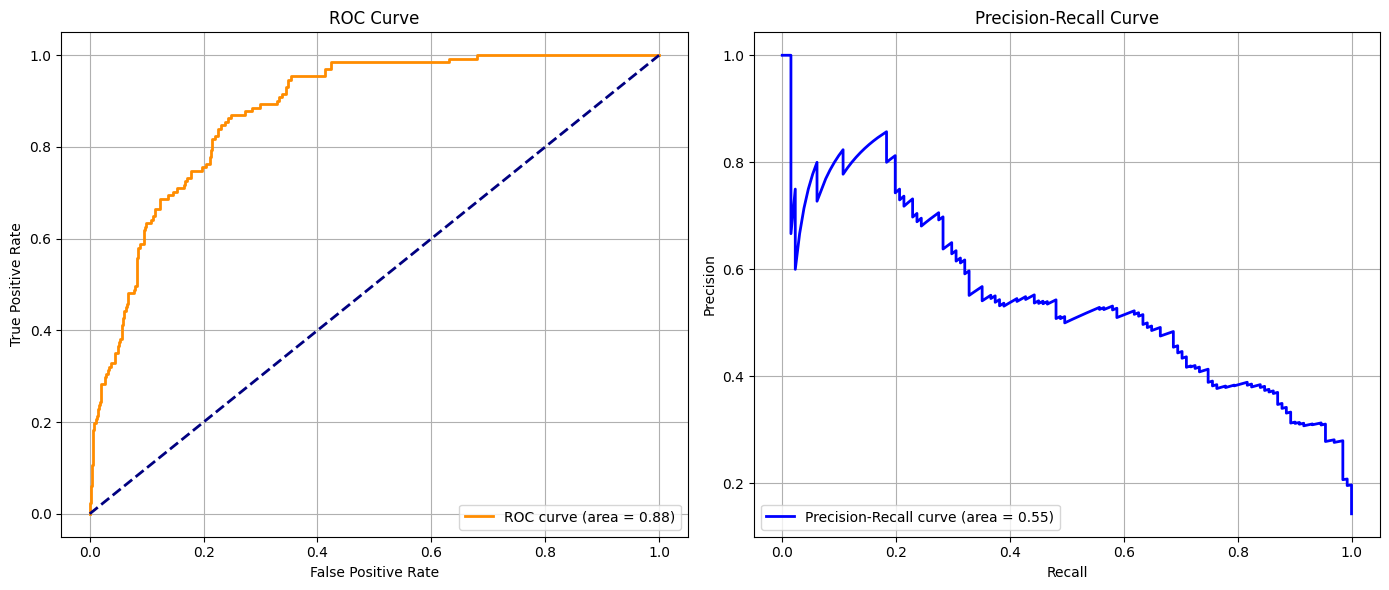

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score


precision, recall, _ = precision_recall_curve(y_train, y_train_pred_proba)
pr_auc = auc(recall, precision)

# Calcular curva ROC
fpr, tpr, _ = roc_curve(y_train, y_train_pred_proba)
roc_auc = auc(fpr, tpr)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de la curva ROC
ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve')
ax1.legend(loc="lower right")
ax1.grid()

# Gráfico de la curva de Precisión-Recall
ax2.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.legend(loc="lower left")
ax2.grid()

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [3]:
from statsmodels.api import Logit, add_constant
import numpy as np

Wine['Calidad'] = np.where(Wine['quality'] >= 7, 1, 0)

X = add_constant(Wine.drop(columns=["pH", "density","residual sugar","citric acid","Calidad","quality"]))
y = Wine.Calidad

# Ajustar un modelo de regresión logística
model = Logit(y, X).fit(disp=False)

In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from statsmodels.api import Logit, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.api import Logit, add_constant
import numpy as np

Wine['Calidad'] = np.where(Wine['quality'] >= 7, 1, 0)

X = add_constant(Wine.drop(columns=["pH", "density","residual sugar","citric acid","Calidad","quality","Id"]))
y = Wine.Calidad

# Ajustar un modelo de regresión logística
model = Logit(y, X).fit(disp=False)

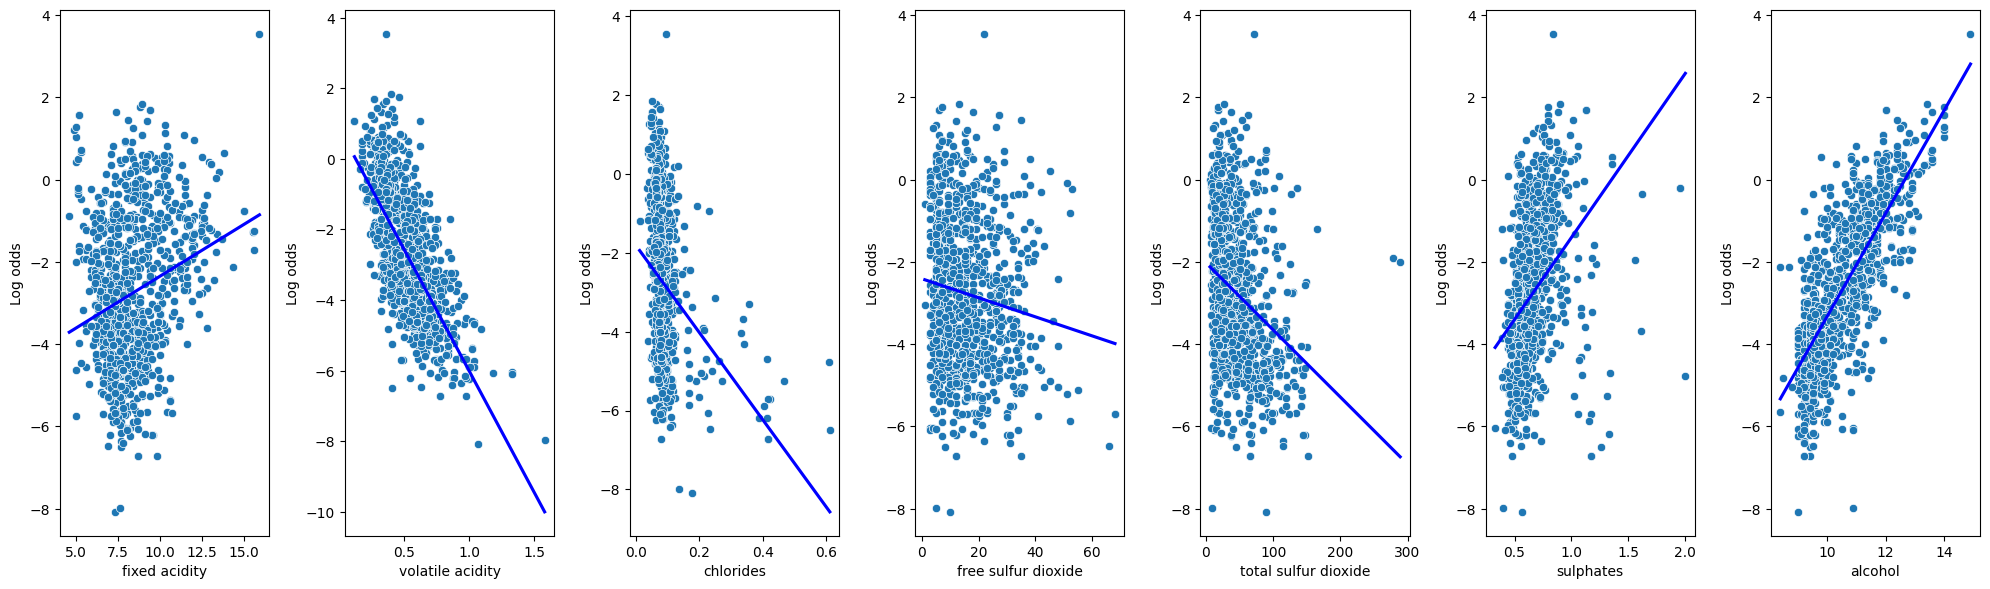

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Asume que model es el modelo de regresión logística ajustado
logit_pred = np.log(model.predict() / (1 - model.predict()))  # Calcula el logit de probabilidad

plt.figure(figsize=(20, 6))
for i, column in enumerate(X.columns[1:]):  # Omitir la constante
    plt.subplot(1, len(X.columns) - 1, i + 1)
    sns.scatterplot(x=X[column], y=logit_pred)
    sns.regplot(x=X[column], y=logit_pred, ci=None, scatter=False, color='blue')  # Línea de regresión lineal
    plt.xlabel(column)
    plt.ylabel("Log odds")
plt.tight_layout()
plt.show()


In [21]:
from scipy import stats

influence = model.get_influence()

summ_df = influence.summary_frame()

# Filter summary df to Cook distance
diagnosis_df = summ_df.loc[:,['cooks_d']]

# Append absolute standardized residual values
diagnosis_df['std_resid'] = stats.zscore(model.resid_pearson)
diagnosis_df['std_resid'] = diagnosis_df.loc[:,'std_resid'].apply(lambda x: np.abs(x))

# Sort by Cook's Distance
diagnosis_df.sort_values("cooks_d", ascending=False)
diagnosis_df

,cooks_d,std_resid
0,9.447855e-07,0.080891
1,6.172080e-07,0.058970
2,1.217998e-06,0.088374
3,1.192319e-04,0.377940
4,9.447855e-07,0.080891
...,...,...
1138,1.123155e-04,0.388517
1139,1.155399e-05,0.166670
1140,9.880550e-06,0.165827
1141,2.275081e-04,0.396514


In [22]:
cook_threshold = 4 / len(X)
print(f"Threshold for Cook Distance = {cook_threshold}")

Threshold for Cook Distance = 0.003499562554680665


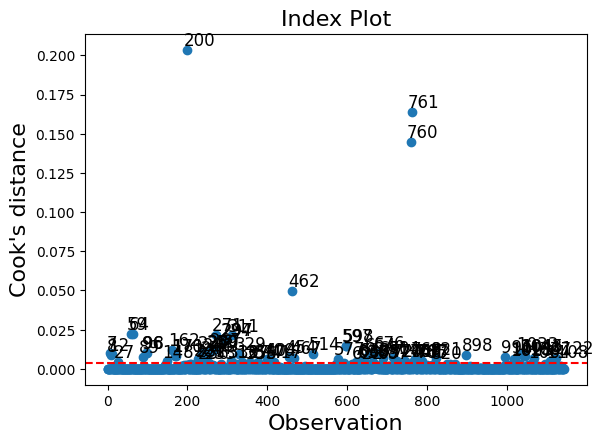

In [37]:
fig = influence.plot_index(y_var="cooks", threshold=cook_threshold)
plt.axhline(y=cook_threshold, ls="--", color='red')
fig.tight_layout(pad=2)

In [25]:
outliers = diagnosis_df[diagnosis_df['cooks_d'] > cook_threshold]
prop_outliers = round(100*(len(outliers) / len(X)),1)
print(f'Proportion of data points that are highly influential = {prop_outliers}%')

Proportion of data points that are highly influential = 6.9%


In [ ]:
# Find number of observations which are BOTH outlier (std dev > 3) and highly influential
extreme = diagnosis_df[(diagnosis_df['cooks_d'] > cook_threshold) & 
                       (diagnosis_df['std_resid'] > 3)]

prop_extreme = round(100*(len(extreme) / len(X)),1)
print(f'Proportion of highly influential outliers = {prop_extreme}%')

Proportion of highly influential outliers = 2.3%


In [28]:
extreme.sort_values("cooks_d", ascending=False).head()

,cooks_d,std_resid
200,0.203523,5.955418
761,0.164109,3.131221
760,0.144576,3.003753
462,0.049510,6.688815
294,0.018576,4.335598


C:\Users\diego\AppData\Local\Temp\ipykernel_9952\471310443.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'].astype(int)
c:\Users\diego\miniconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\diego\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Resumen del modelo logístico:
                            Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Wed, 13 Nov 2024   Pseudo R-squ.:                   1.000
Time:                        17:10:00   Log-Likelihood:            -8.9814e-06
converged:                      False   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 5.547e-29
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.6813    1.2e+04      0.001      0.999   -2.35e+04    2.35e+04
sepal length (cm)    -4.1173   3316.583     -0.001      0.999   -6504.500    64

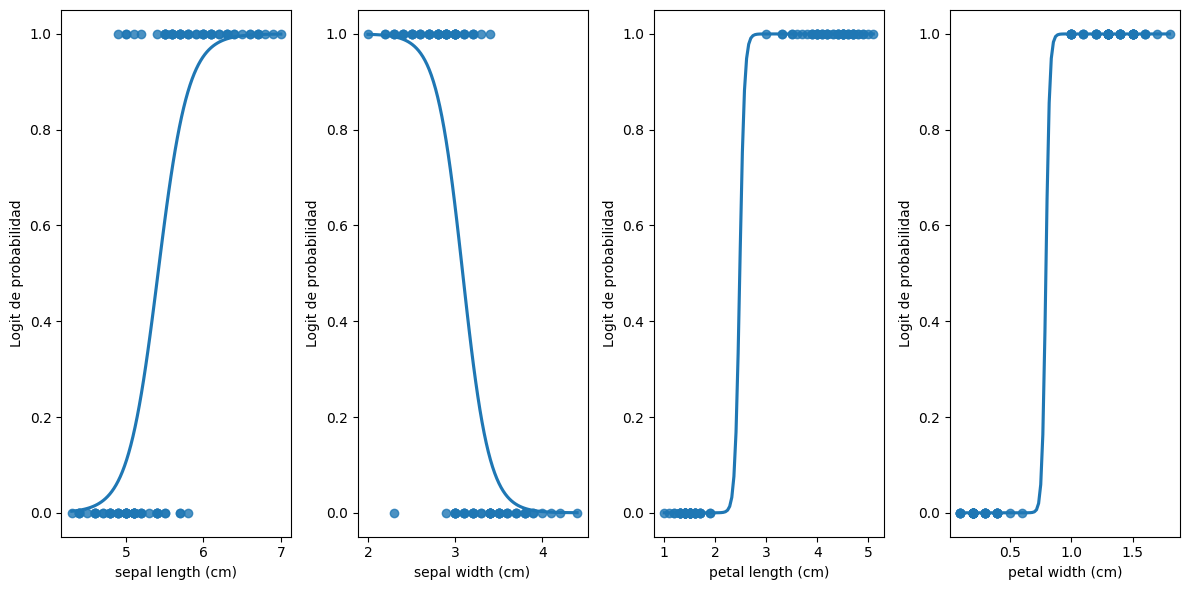


Factor de Inflación de Varianza (VIF):
              Feature         VIF
0              const  163.617996
1  sepal length (cm)    4.803414
2   sepal width (cm)    2.594389
3  petal length (cm)   36.246326
4   petal width (cm)   25.421395


c:\Users\diego\miniconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:5312: RuntimeWarning: invalid value encountered in divide
  return (endog - M*p)/np.sqrt(M*p*(1-p))


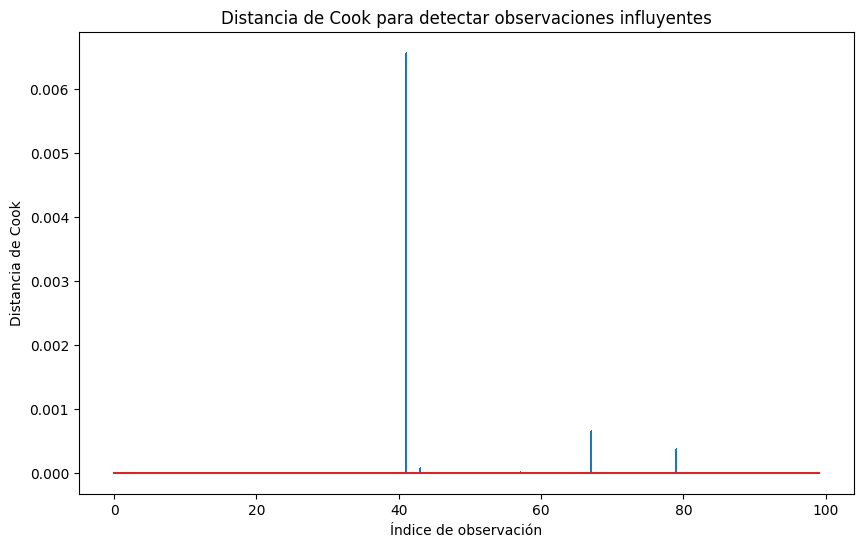

In [24]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from statsmodels.api import Logit, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar un dataset de ejemplo
data = load_iris(as_frame=True)
df = data.frame[data.target != 2]  # Solo dos clases para regresión logística binaria
df['target'] = df['target'].astype(int)

# 1. Relación lineal entre predictores y el logit
# Añadir una constante para el modelo
X = add_constant(df.drop(columns="target"))
y = df['target']

# Ajustar un modelo de regresión logística
model = Logit(y, X).fit(disp=False)
print("Resumen del modelo logístico:\n", model.summary())

# Visualizar la relación entre los predictores y el logit
plt.figure(figsize=(12, 6))
for i, column in enumerate(X.columns[1:]):  # Omitir la constante
    plt.subplot(1, len(X.columns) - 1, i + 1)
    sns.regplot(x=df[column], y=model.predict(), logistic=True, ci=None)
    plt.xlabel(column)
    plt.ylabel("Logit de probabilidad")
plt.tight_layout()
plt.show()

# 2. Independencia de las observaciones
# No existe un test específico para esto, pero si los datos tienen estructura temporal, podrías comprobar autocorrelación.
# Aquí asumimos que los datos son independientes.

# 3. Ausencia de colinealidad
# Calcular el factor de inflación de varianza (VIF)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nFactor de Inflación de Varianza (VIF):\n", vif_data)

# 4. Detección de outliers influyentes
# Usar la distancia de Cook para detectar outliers
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

# Visualizar los valores de Cook
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.xlabel("Índice de observación")
plt.ylabel("Distancia de Cook")
plt.title("Distancia de Cook para detectar observaciones influyentes")
plt.show()
